In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateparser
import warnings
warnings.filterwarnings('ignore')

# DEFINE PROBLEM

- Dataset is taken from historical sales transaction in 3 different branch and city of supermarket located in Myanmar for Jan-Mar 2019 Period. 
- Q2 sales is targeted increase from Q1 Period

# DEFINE GOALS

- Increase Q2 2019 Supermarket Sales trough transaction data analysis
- Optimize cashier shift through transaction data analysis

### IMPORT FILE

In [2]:
df = pd.read_csv('supermarket.csv')

### DATA TYPE OVERALL CHECK

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
print(df.shape)

(1000, 17)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
## df.head(), df.shape, df.info() is utilized to capture dataset genereal information

# DESCRIPTIVE ANALYSIS, HANDLING OUTLIERS, AND HANDLING MISSING VALUE

### DESCRIPTIVE ANALYSIS

In [7]:
df.describe(include = 'O')
## To get general information of Categorical Statistic
## From this table We know, top transaction is occured in Yangon branch 
## Member customers are top customers in Supermarket
## Female is dominate to shop in Supermarket
## Fashion accessoris is the best seller item in Super market
## Most transation occured on 19:48 
## Ewallet is dominate for payment methond transaction
## ==> We will do deeper analysis in Univariate & Multivariate Analysis

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,290-68-2984,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


In [8]:
df['Branch'].unique()
# To get branch code of supermarket

array(['A', 'C', 'B'], dtype=object)

In [9]:
df['City'].unique()
## To get location of supermarket branch ==> Located in three different Area

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [10]:
pd.concat([df['Branch'], df['City']], axis=1)

# Branch A => Located in Yangon
# Branch B => Located in Mandalay
# Branch C => Located in Naypyitaw

,Branch,City
0,A,Yangon
1,C,Naypyitaw
2,A,Yangon
3,A,Yangon
4,A,Yangon
...,...,...
995,C,Naypyitaw
996,B,Mandalay
997,A,Yangon
998,A,Yangon


In [11]:
df['Customer type'].unique()
## To get unique Cutomer Type Value ==> There are two types of supermarket customer

array(['Member', 'Normal'], dtype=object)

In [12]:
df['Gender'].unique()
## To get unique Gender Value

array(['Female', 'Male'], dtype=object)

In [13]:
df['Product line'].unique()
## To get unique value of product line ==> There are 6 Product Line sold in Supermarket

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [14]:
df['Payment'].unique()
## To get unique value of Payment Method ==> There are 3 methods of payment in Supermarket

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [15]:
round(df.describe(),2)
## To get general information of numerical columns
## Range unit price sell in supermarket is between 10.08 and 99.96 Myanmar Kyat with average 55.56 Kyat
## Top quantity customers buy in one transaction is 10, where the average is 5.51
## Max Rating customer given to Supermarket is 10, and Min Rating is 4
## Gross income range in supermarket is between 0.51 and 49.

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,55.67,5.51,15.38,322.97,307.59,4.76,15.38,6.97
std,26.49,2.92,11.71,245.89,234.18,0.00,11.71,1.72
min,10.08,1.00,0.51,10.68,10.17,4.76,0.51,4.00
25%,32.88,3.00,5.92,124.42,118.50,4.76,5.92,5.50
50%,55.23,5.00,12.09,253.85,241.76,4.76,12.09,7.00
75%,77.94,8.00,22.45,471.35,448.90,4.76,22.45,8.50
max,99.96,10.00,49.65,1042.65,993.00,4.76,49.65,10.00


In [16]:
round(df.corr(),2)
## Unit price & Quantity is positively correlated with COGS and Gross income
## Rating hardly has many correlation with other variables

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,-0.0,0.63,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,-0.0,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
gross margin percentage,-0.00,-0.00,0.00,0.00,0.00,1.0,0.00,0.00
gross income,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,0.0,-0.04,1.00


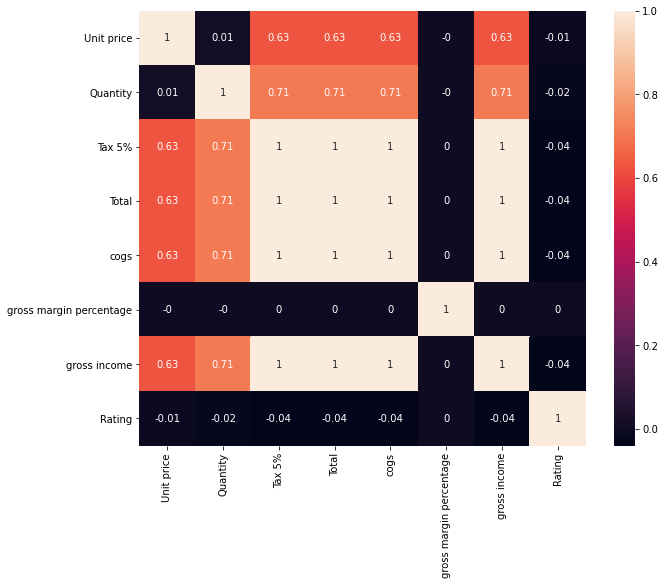

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(round(df.corr(),2), annot=True)
plt.show()

### MISSING VALUE CHECK & HANDLING

In [18]:
df.isna().sum()
## From information below, dataset has no missing value. So, we don't need to drop or fill any value into dataset.

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

### OUTLIERS CHECK & HANDLING

In [19]:
outliers = []
def cek_outlier(data):
    sorted(data)
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3-q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    for i in data:
        if i < lower_fence or i > upper_fence:
            outliers.append(i)
    return outliers

In [20]:
outliers = []
cek_outlier(df['Unit price'])

[]

In [21]:
outliers = []
cek_outlier(df['Quantity'])

[]

In [22]:
outliers = []
cek_outlier(df['Total'])

[1003.59,
 1039.29,
 1042.65,
 1002.12,
 1020.705,
 1034.46,
 1023.75,
 1022.385,
 1022.49]

In [23]:
df[df['Total'].isin(outliers)]
## To see which transaction cause outliers value of total

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
166,234-65-2137,C,Naypyitaw,Normal,Male,Home and lifestyle,95.58,10,47.790,1003.590,1/16/2019,13:32,Cash,955.8,4.761905,47.790,4.8
167,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.490,1039.290,2/8/2019,16:20,Credit card,989.8,4.761905,49.490,8.7
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.650,1042.650,2/15/2019,14:53,Credit card,993.0,4.761905,49.650,6.6
357,554-42-2417,C,Naypyitaw,Normal,Female,Sports and travel,95.44,10,47.720,1002.120,1/9/2019,13:45,Cash,954.4,4.761905,47.720,5.2
422,271-88-8734,C,Naypyitaw,Member,Female,Fashion accessories,97.21,10,48.605,1020.705,2/8/2019,13:00,Credit card,972.1,4.761905,48.605,8.7
557,283-26-5248,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.260,1034.460,1/30/2019,20:23,Ewallet,985.2,4.761905,49.260,4.5
699,751-41-9720,C,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.750,1023.750,1/12/2019,16:18,Ewallet,975.0,4.761905,48.750,8.0
792,744-16-7898,B,Mandalay,Normal,Female,Home and lifestyle,97.37,10,48.685,1022.385,1/15/2019,13:48,Credit card,973.7,4.761905,48.685,4.9
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.690,1022.490,3/2/2019,17:16,Ewallet,973.8,4.761905,48.690,4.4


In [24]:
outliers = []
cek_outlier(df['cogs'])

[955.8, 989.8, 993.0, 954.4, 972.1, 985.2, 975.0, 973.7, 973.8]

In [25]:
df[df['cogs'].isin(outliers)]
## To see which transaction cause outliers value of cogs

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
166,234-65-2137,C,Naypyitaw,Normal,Male,Home and lifestyle,95.58,10,47.790,1003.590,1/16/2019,13:32,Cash,955.8,4.761905,47.790,4.8
167,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.490,1039.290,2/8/2019,16:20,Credit card,989.8,4.761905,49.490,8.7
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.650,1042.650,2/15/2019,14:53,Credit card,993.0,4.761905,49.650,6.6
357,554-42-2417,C,Naypyitaw,Normal,Female,Sports and travel,95.44,10,47.720,1002.120,1/9/2019,13:45,Cash,954.4,4.761905,47.720,5.2
422,271-88-8734,C,Naypyitaw,Member,Female,Fashion accessories,97.21,10,48.605,1020.705,2/8/2019,13:00,Credit card,972.1,4.761905,48.605,8.7
557,283-26-5248,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.260,1034.460,1/30/2019,20:23,Ewallet,985.2,4.761905,49.260,4.5
699,751-41-9720,C,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.750,1023.750,1/12/2019,16:18,Ewallet,975.0,4.761905,48.750,8.0
792,744-16-7898,B,Mandalay,Normal,Female,Home and lifestyle,97.37,10,48.685,1022.385,1/15/2019,13:48,Credit card,973.7,4.761905,48.685,4.9
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.690,1022.490,3/2/2019,17:16,Ewallet,973.8,4.761905,48.690,4.4


In [26]:
outliers = []
cek_outlier(df['gross income'])

[47.79, 49.49, 49.65, 47.72, 48.605, 49.26, 48.75, 48.685, 48.69]

In [27]:
df[df['gross income'].isin(outliers)]
## To see which transaction cause outliers value of gross income

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
166,234-65-2137,C,Naypyitaw,Normal,Male,Home and lifestyle,95.58,10,47.790,1003.590,1/16/2019,13:32,Cash,955.8,4.761905,47.790,4.8
167,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.490,1039.290,2/8/2019,16:20,Credit card,989.8,4.761905,49.490,8.7
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.650,1042.650,2/15/2019,14:53,Credit card,993.0,4.761905,49.650,6.6
357,554-42-2417,C,Naypyitaw,Normal,Female,Sports and travel,95.44,10,47.720,1002.120,1/9/2019,13:45,Cash,954.4,4.761905,47.720,5.2
422,271-88-8734,C,Naypyitaw,Member,Female,Fashion accessories,97.21,10,48.605,1020.705,2/8/2019,13:00,Credit card,972.1,4.761905,48.605,8.7
557,283-26-5248,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.260,1034.460,1/30/2019,20:23,Ewallet,985.2,4.761905,49.260,4.5
699,751-41-9720,C,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.750,1023.750,1/12/2019,16:18,Ewallet,975.0,4.761905,48.750,8.0
792,744-16-7898,B,Mandalay,Normal,Female,Home and lifestyle,97.37,10,48.685,1022.385,1/15/2019,13:48,Credit card,973.7,4.761905,48.685,4.9
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.690,1022.490,3/2/2019,17:16,Ewallet,973.8,4.761905,48.690,4.4


In [28]:
outliers = []
cek_outlier(df['Rating'])

[]

In [29]:
df[df['Quantity'] == 10]
## Cek How many Transaction with Quantity 10

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.780,772.380,2/24/2019,11:38,Ewallet,735.6,4.761905,36.780,8.0
13,252-56-2699,A,Yangon,Normal,Male,Food and beverages,43.19,10,21.595,453.495,2/7/2019,16:48,Ewallet,431.9,4.761905,21.595,8.2
14,829-34-3910,A,Yangon,Normal,Female,Health and beauty,71.38,10,35.690,749.490,3/29/2019,19:21,Cash,713.8,4.761905,35.690,5.7
49,574-22-5561,C,Naypyitaw,Member,Female,Fashion accessories,82.63,10,41.315,867.615,3/19/2019,17:08,Ewallet,826.3,4.761905,41.315,7.9
58,817-48-8732,A,Yangon,Member,Female,Home and lifestyle,72.35,10,36.175,759.675,1/20/2019,15:55,Cash,723.5,4.761905,36.175,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.315,888.615,1/1/2019,11:36,Credit card,846.3,4.761905,42.315,9.0
988,267-62-7380,C,Naypyitaw,Member,Male,Electronic accessories,82.34,10,41.170,864.570,3/29/2019,19:12,Ewallet,823.4,4.761905,41.170,4.3
991,602-16-6955,B,Mandalay,Normal,Female,Sports and travel,76.60,10,38.300,804.300,1/24/2019,18:10,Ewallet,766.0,4.761905,38.300,6.0
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.745,183.645,2/22/2019,18:35,Ewallet,174.9,4.761905,8.745,6.6


In [30]:
df_outliers = pd.concat([df['Unit price'], df['Quantity'], df['Total'], df['cogs'], df['gross income'], df['Rating']], axis=1)
## Create DF outliers for outliers visualization

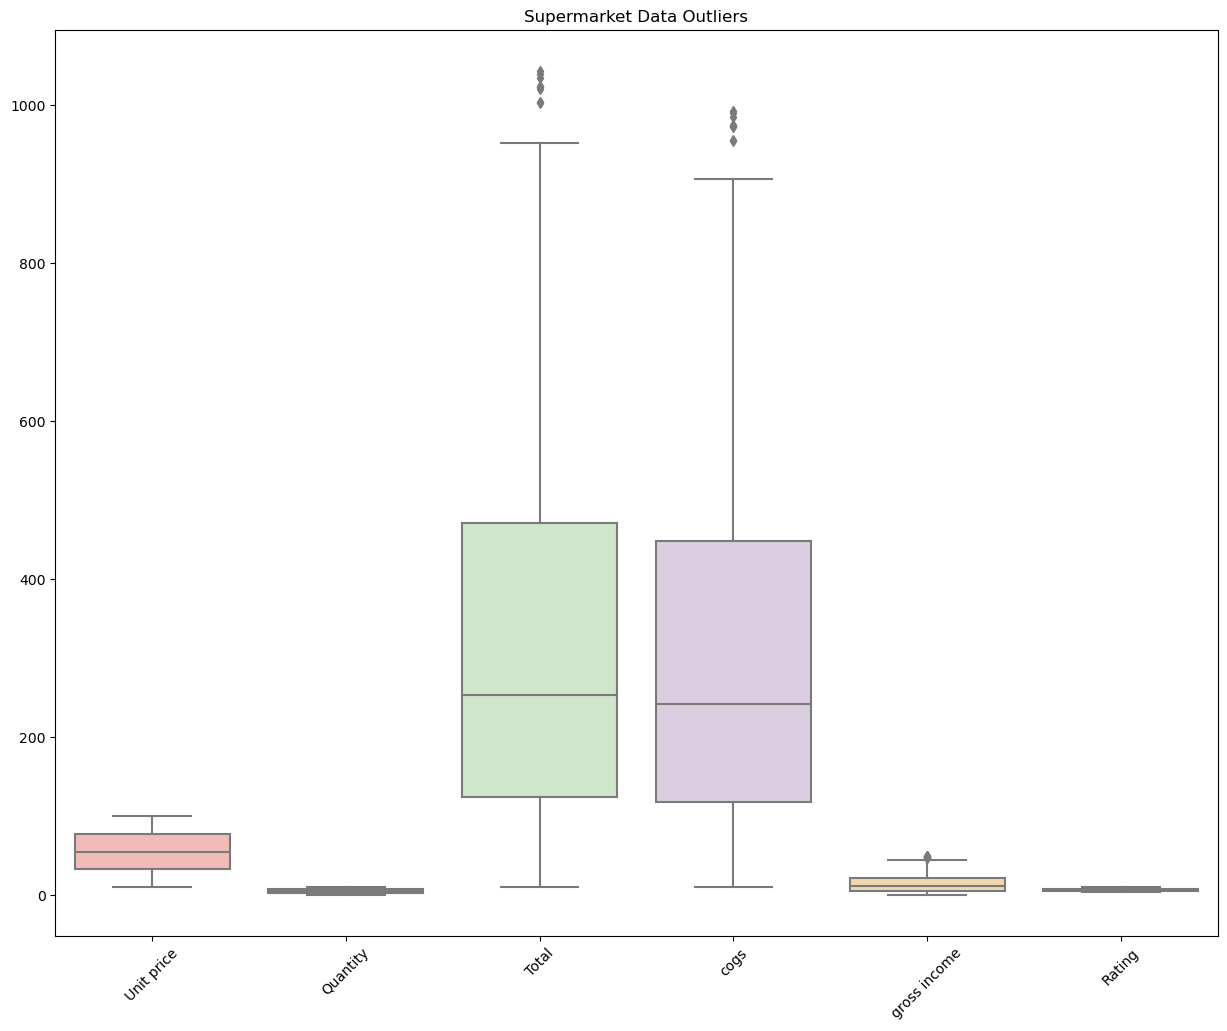

In [31]:
plt.figure(figsize=(15,12),dpi=100)
sns.boxplot(data=df_outliers, palette='Pastel1' )
plt.title("Supermarket Data Outliers")
plt.xticks(rotation=45)
plt.show()
## Visualize Outliers Value 

In [32]:
### Outliers value happen when in one transaction, customers buy 10 item with individual item price > 95 Myanmar Kyat

### DATE AND TIME HANDLING

In [33]:
df.dtypes
## Knowing current type data of Date & Time ==> Still in object type

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [34]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
## Change Date Tipe Type Data Into datetime64

In [35]:
df.dtypes
## Date & Time Data have been changed

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [36]:
purchase_date = df['Date'].dt

In [37]:
df['Month'] = purchase_date.month
df['Day Name'] = purchase_date.day_name()
## Make Month & Day Name Column for further analysis

In [38]:
hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day Name'] = pd.Categorical(df['Day Name'], categories=hari, ordered=True)

In [39]:
purchase_time = df['Time'].apply(dateparser.parse).dt

In [40]:
df['Hour'] = purchase_time.hour
## Create Hour Colum (Bottom Rounding) for further analysis

# EXPLORATORY DATA ANALYSIS & DATA VISUALIZATION

In [41]:
df.head()
## See Current Table

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day Name,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,Saturday,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,Friday,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,Sunday,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,Sunday,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,Friday,10


### UNIVARIATE ANALYSIS

In [42]:
df_city = df.pivot_table(index='City', values='Quantity', aggfunc='sum').sort_values('Quantity', ascending=False).reset_index()
df_city.rename(columns = {'Quantity':'Sales'}, inplace=True)
df_city
## Get quantity sales by city

,City,Sales
0,Yangon,1859
1,Naypyitaw,1831
2,Mandalay,1820


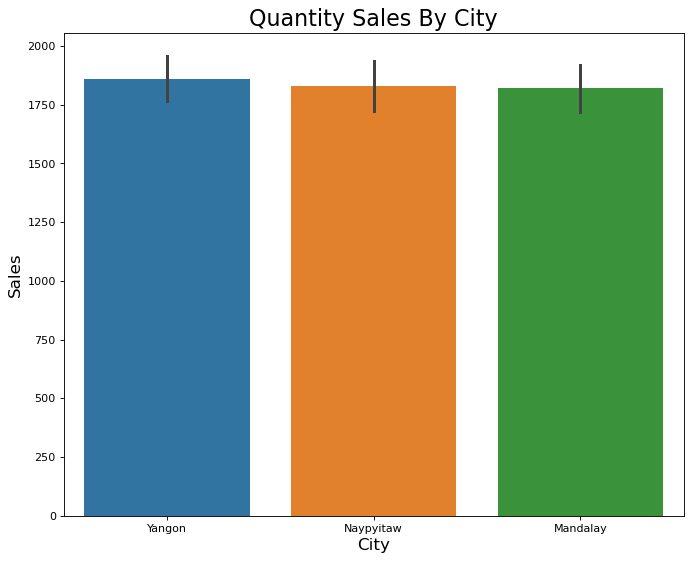

In [43]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x='City', y='Quantity', data = df, estimator=sum)
plt.title('Quantity Sales By City', size =20)
plt.xlabel("City",size = 15)
plt.ylabel("Sales", size = 15)
plt.show()
## Show quantity sales by city

#### Quantity Sales By Branch City
- Quantity Sales share in three branch are quite even.
- Yangon has the highest quantity sales.
- Naypyitaw and Mandalay quantity sales only less behind Yangon 
- Because numbers sales quite the same, we focused on supermarket as a whole improvement sales

In [44]:
df_productline = df.pivot_table(index='Product line', values='Quantity', aggfunc='count').sort_values('Quantity', ascending=False).reset_index()
df_productline.rename(columns = {'Quantity':'Sales'}, inplace=True)
df_productline
## Get sales data by product line

,Product line,Sales
0,Fashion accessories,178
1,Food and beverages,174
2,Electronic accessories,170
3,Sports and travel,166
4,Home and lifestyle,160
5,Health and beauty,152


In [45]:
df_productlineqty = df.pivot_table(index='Product line', values='Quantity', aggfunc='sum').sort_values('Quantity', ascending=False).reset_index()
df_productlineqty.rename(columns = {'Quantity':'Sales'}, inplace=True)
df_productlineqty
# get quantity sales data by product line

,Product line,Sales
0,Electronic accessories,971
1,Food and beverages,952
2,Sports and travel,920
3,Home and lifestyle,911
4,Fashion accessories,902
5,Health and beauty,854


In [46]:
df_productlineavg = df.pivot_table(index='Product line', values='Quantity', aggfunc='mean').sort_values('Quantity', ascending=False).reset_index()
df_productlineavg.rename(columns = {'Quantity':'Sales'}, inplace=True)
df_productlineavg
## Get number of average quantity sales per transaction by product line

,Product line,Sales
0,Electronic accessories,5.711765
1,Home and lifestyle,5.693750
2,Health and beauty,5.618421
3,Sports and travel,5.542169
4,Food and beverages,5.471264
5,Fashion accessories,5.067416


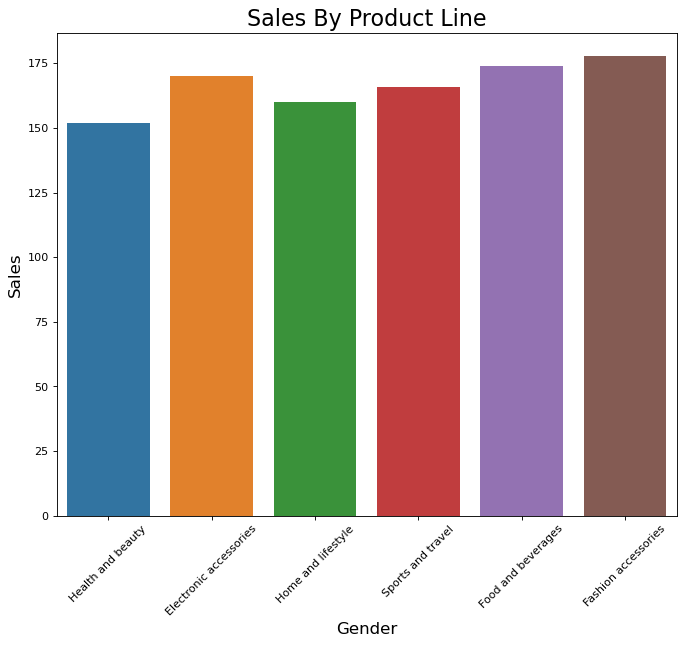

In [47]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['Product line'])
plt.title('Sales By Product Line', size =20)
plt.xlabel("Gender",size = 15)
plt.ylabel("Sales", size = 15)
plt.xticks(rotation=45)
plt.show()
## Show grapic sales by product line

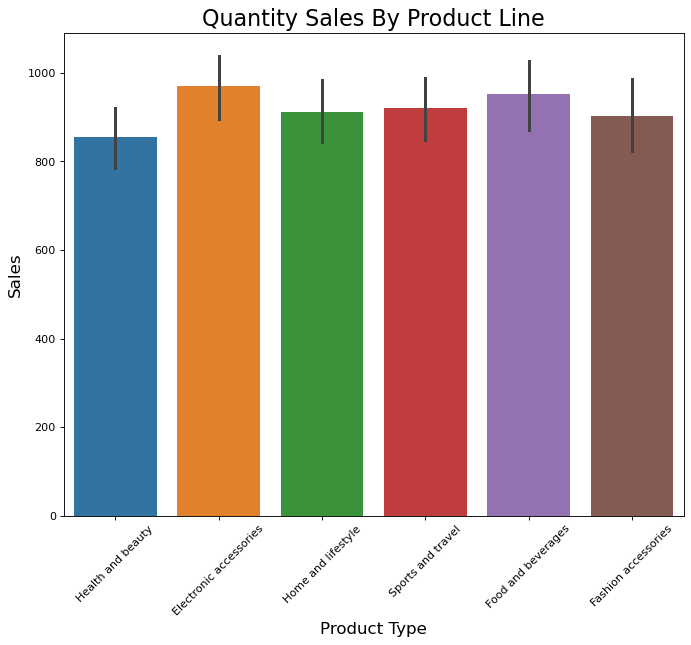

In [48]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'Product line' , y = 'Quantity', data = df, estimator=sum)
plt.title('Quantity Sales By Product Line', size =20)
plt.xlabel("Product Type",size = 15)
plt.ylabel("Sales", size = 15)
plt.xticks(rotation=45)
plt.show()
## Show grapic quantity sales by product line

#### Quantity Sales By Product Line 
- Electronic Accessories and Food & Beverages product are two best sales (sum of quantity). 
- Fashion Accessories and Health & Beauty product are two worst sales (sum of quantity).
- Fashion Accessories has the most transaction number (178) in supermarket, but customers tend to buy it in small quantity resulting only average 5 item/transaction
- Health & Beauty product averaging 5.6 item/transaction (quite good) but has the worst transaction number in supermarket --> Resulting bad quantity sales

In [49]:
df_customertypesales = df.pivot_table(index='Customer type', values='Quantity', aggfunc='count').sort_values('Quantity', ascending=False).reset_index()
df_customertypesales.rename(columns = {'Quantity':'Sales'}, inplace=True)
df_customertypesales
## Get sales data by customer type

,Customer type,Sales
0,Member,501
1,Normal,499


In [50]:
df_customertypeqty = df.pivot_table(index='Customer type', values='Quantity', aggfunc='sum').sort_values('Quantity', ascending=False).reset_index()
df_customertypeqty.rename(columns = {'Quantity':'Sales'}, inplace=True)
df_customertypeqty
# get quantity sales data by customer type

,Customer type,Sales
0,Member,2785
1,Normal,2725


In [51]:
df_customertypeavg = df.pivot_table(index='Customer type', values='Quantity', aggfunc='mean').sort_values('Quantity', ascending=False).reset_index()
df_customertypeavg.rename(columns = {'Quantity':'Sales'}, inplace=True)
df_customertypeavg
## Get number of average quantity sales per transaction by customer type

,Customer type,Sales
0,Member,5.558882
1,Normal,5.460922


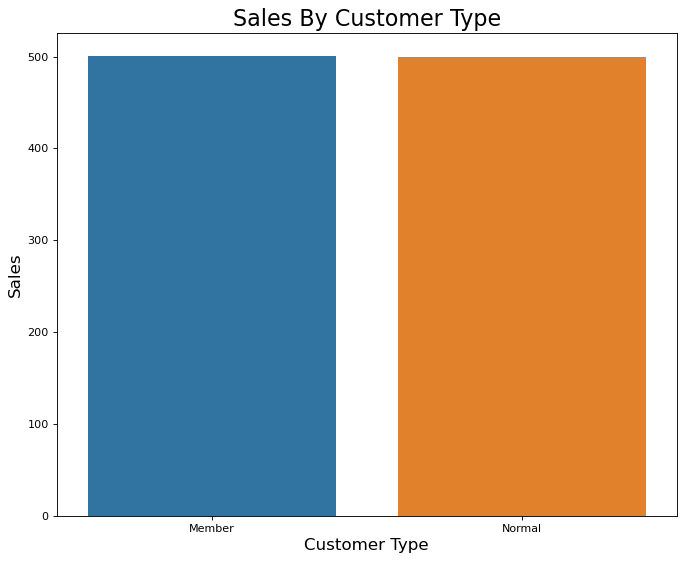

In [52]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['Customer type'])
plt.title('Sales By Customer Type', size =20)
plt.xlabel("Customer Type",size = 15)
plt.ylabel("Sales", size = 15)
plt.show()
## Show grapic sales by customer type

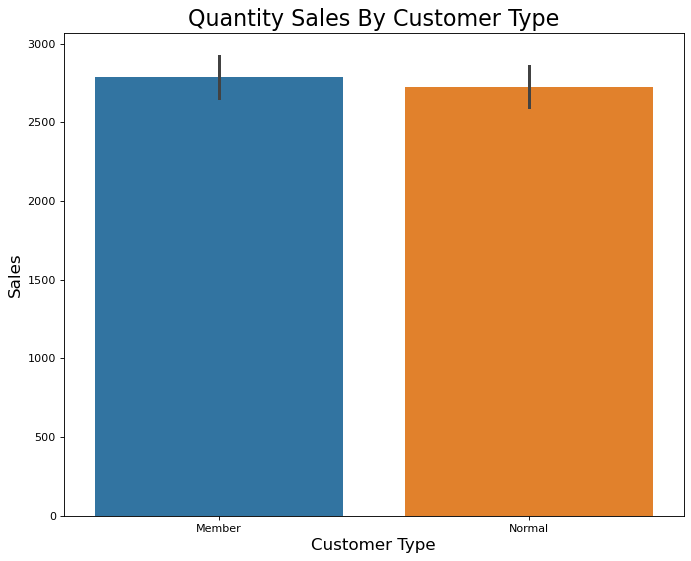

In [53]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'Customer type' , y = 'Quantity', data = df, estimator=sum)
plt.title('Quantity Sales By Customer Type', size =20)
plt.xlabel("Customer Type",size = 15)
plt.ylabel("Sales", size = 15)
plt.show()
## Show grapic quantity sales by customer type

#### Sales By Customer Type
- The number of Member & Non Member Customers are quite even. (Member 2 more than Non-Member)
- Member customers tend to buy more quantity of item than Non-Member customers

In [54]:
df_gendersales= df.pivot_table(index='Gender', values='Quantity', aggfunc='count').sort_values('Quantity', ascending=False).reset_index()
df_gendersales.rename(columns = {'Quantity':'Sales'}, inplace=True)
df_gendersales
## Get sales data by customer gender

,Gender,Sales
0,Female,501
1,Male,499


In [55]:
df_genderqty= df.pivot_table(index='Gender', values='Quantity', aggfunc='sum').sort_values('Quantity', ascending=False).reset_index()
df_genderqty.rename(columns = {'Quantity':'Sales'}, inplace=True)
df_genderqty
# get quantity sales data by customer gender

,Gender,Sales
0,Female,2869
1,Male,2641


In [56]:
df_gendermean= df.pivot_table(index='Gender', values='Quantity', aggfunc='mean').sort_values('Quantity', ascending=False).reset_index()
df_gendermean.rename(columns = {'Quantity':'Sales'}, inplace=True)
df_gendermean
## Get number of average quantity sales per transaction by customer gender

,Gender,Sales
0,Female,5.726547
1,Male,5.292585


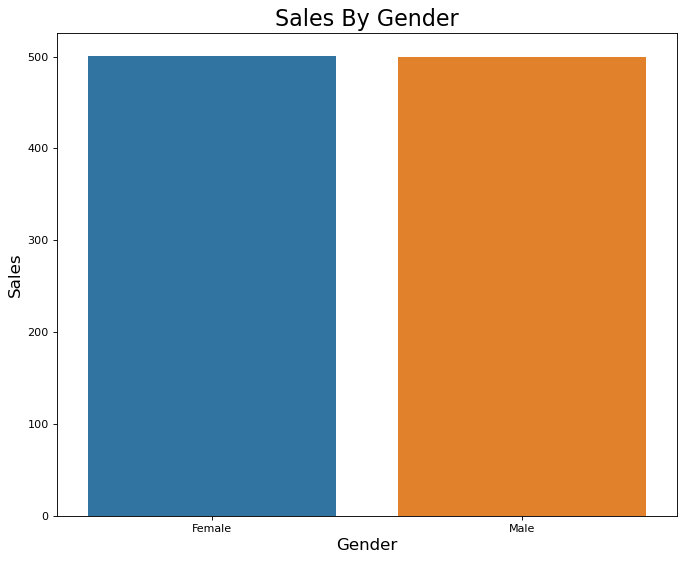

In [57]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['Gender'])
plt.title('Sales By Gender', size =20)
plt.xlabel("Gender",size = 15)
plt.ylabel("Sales", size = 15)
plt.show()
## Show grapic sales by Gender

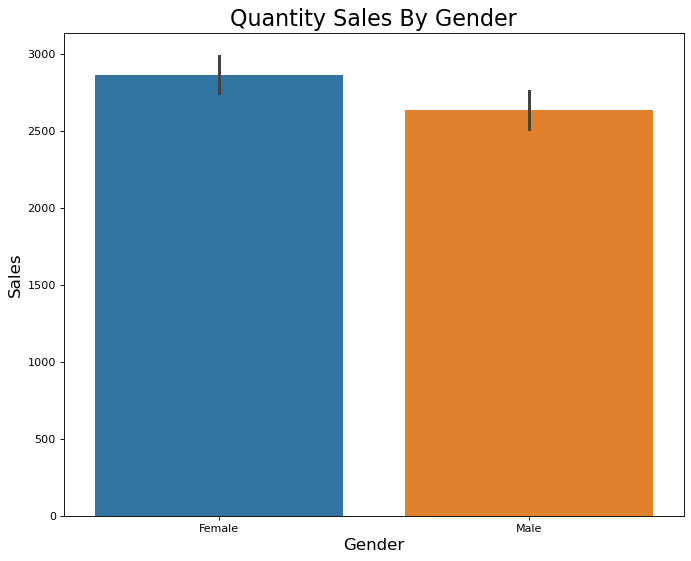

In [58]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'Gender' , y = 'Quantity', data = df, estimator=sum)
plt.title('Quantity Sales By Gender', size =20)
plt.xlabel("Gender",size = 15)
plt.ylabel("Sales", size = 15)
plt.show()
## Show grapic quantity sales by gender

#### Sales By Customer Gender
- The number of Male & Female Customers are quite even. (Female 2 more than Non-Member)
- Female tend to buy more quantity of item than Male 

In [59]:
df_paymentsales = df.pivot_table(index='Payment', values='Quantity', aggfunc='count').sort_values('Quantity', ascending=False).reset_index()
df_paymentsales.rename(columns = {'Total':'Transaction'}, inplace=True)
df_paymentsales
## Get sales data by payment type

,Payment,Quantity
0,Ewallet,345
1,Cash,344
2,Credit card,311


In [60]:
df_paymentsalesqty = df.pivot_table(index='Payment', values='Quantity', aggfunc='sum').sort_values('Quantity', ascending=False).reset_index()
df_paymentsalesqty.rename(columns = {'Total':'Transaction'}, inplace=True)
df_paymentsalesqty
# get quantity sales data by payment type

,Payment,Quantity
0,Cash,1896
1,Ewallet,1892
2,Credit card,1722


In [61]:
df_paymentsalesmean = df.pivot_table(index='Payment', values='Quantity', aggfunc='mean').sort_values('Quantity', ascending=False).reset_index()
df_paymentsalesmean.rename(columns = {'Total':'Transaction'}, inplace=True)
df_paymentsalesmean
## Get number of average quantity sales per transaction by payment type

,Payment,Quantity
0,Credit card,5.536977
1,Cash,5.511628
2,Ewallet,5.484058


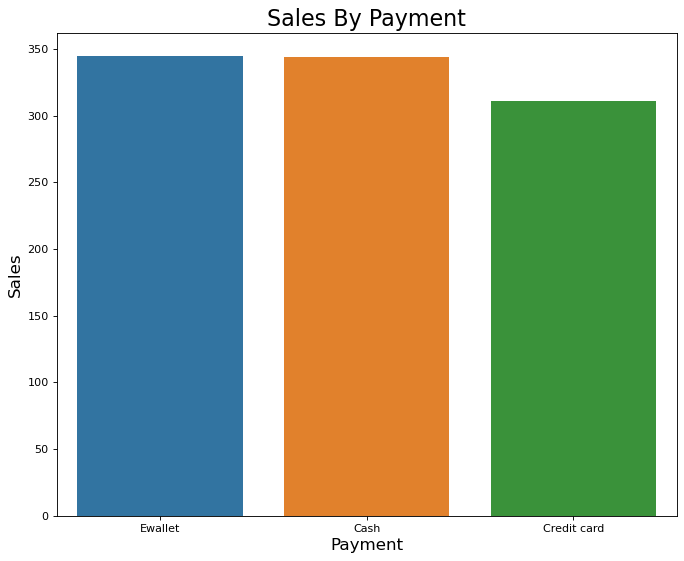

In [62]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['Payment'])
plt.title('Sales By Payment', size =20)
plt.xlabel("Payment",size = 15)
plt.ylabel("Sales", size = 15)
plt.show()
## Show graphic sales by Payment

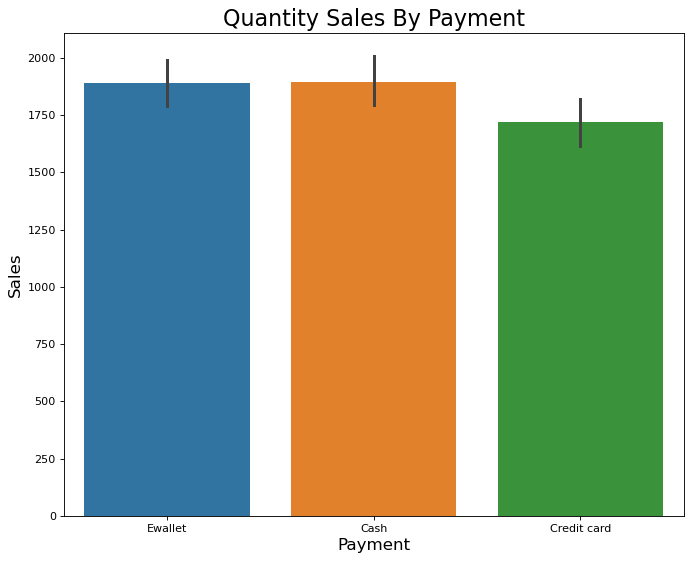

In [63]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'Payment' , y = 'Quantity', data = df, estimator=sum)
plt.title('Quantity Sales By Payment', size =20)
plt.xlabel("Payment",size = 15)
plt.ylabel("Sales", size = 15)
plt.show()
## Show grapic quantity sales by Payment

#### Sales By Customer Gender
- Customers tend to use E-Wallet and Cash Rather than Credit Card

In [64]:
df_month = df.pivot_table(index='Month', values='Quantity', aggfunc='count').reset_index()
df_month.rename(columns = {'Quantity':'Sales'}, inplace=True)
df_month
## Get sales data by Month

,Month,Sales
0,1,352
1,2,303
2,3,345


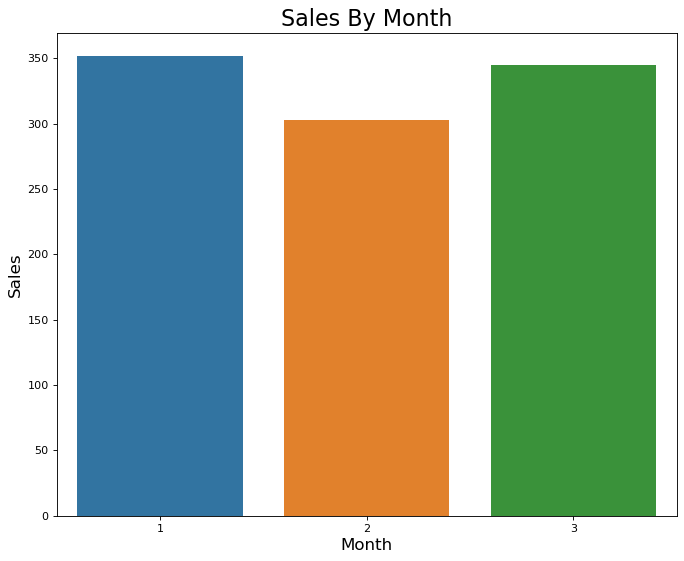

In [65]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['Month'])
plt.title('Sales By Month', size =20)
plt.xlabel("Month",size = 15)
plt.ylabel("Sales", size = 15)
plt.show()
## Show graphic sales by Month

#### Monthly Sales
- February has the lowest sales due to difference amount of day (Less Day)

In [66]:
df_dayname = df.pivot_table(index='Day Name', values='Total', aggfunc='count').reset_index()
df_dayname.rename(columns = {'Total':'Transaction'}, inplace=True)
df_dayname
## Get sales data by Month

,Day Name,Transaction
0,Monday,125
1,Tuesday,158
2,Wednesday,143
3,Thursday,138
4,Friday,139
5,Saturday,164
6,Sunday,133


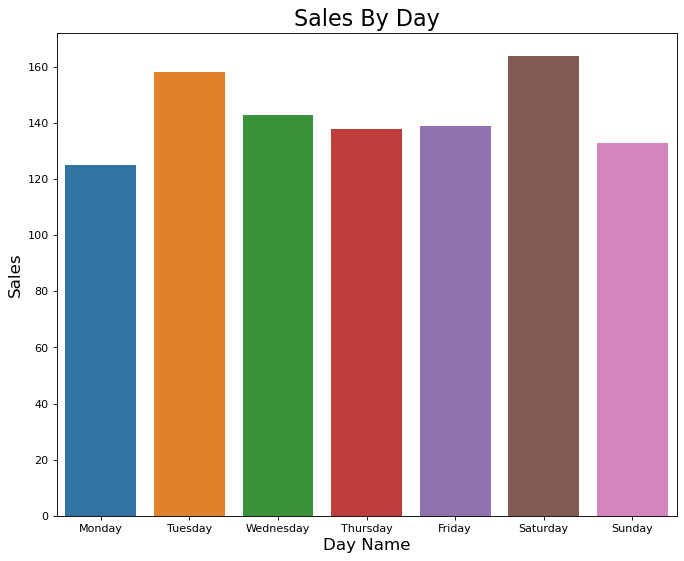

In [67]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['Day Name'])
plt.title('Sales By Day', size =20)
plt.xlabel("Day Name",size = 15)
plt.ylabel("Sales", size = 15)
plt.show()
## Show graphic sales by Month

#### Daily Sales
- Most transaction occured on Saturday & Tuesday while Least transaction occured on Monday 

In [68]:
df_time = df.pivot_table(index='Hour', values='Total', aggfunc='count').reset_index()
df_time.rename(columns = {'Total':'Transaction'}, inplace=True)
df_time
## Get sales data by Time

,Hour,Transaction
0,10,101
1,11,90
2,12,89
3,13,103
4,14,83
5,15,102
6,16,77
7,17,74
8,18,93
9,19,113


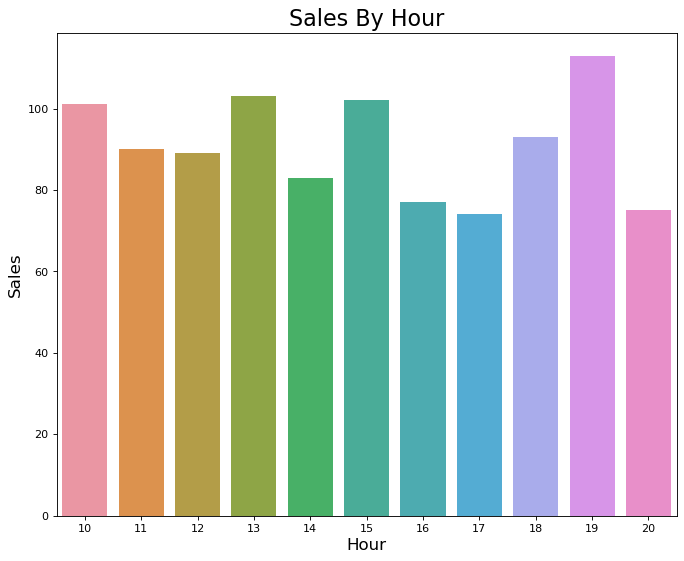

In [69]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['Hour'])
plt.title('Sales By Hour', size =20)
plt.xlabel("Hour",size = 15)
plt.ylabel("Sales", size = 15)
plt.show()
## Show graphic sales by Hour

#### Hourly Sales
- Rush Hour Transaction occured on 19:00 - 19:59 and Least Hour Transaction occured on 17:00 - 17:59

### MULTIVARIATE ANALYSIS

In [70]:
df_analysis1 = df.pivot_table(index=['Product line', 'Gender'], values='Quantity', aggfunc='sum')
df_analysis1.rename(columns = {'Total':'Sales'}, inplace=True)
df_analysis1

Quantity
Product line           Gender          
Electronic accessories Female       488
                       Male         483
Fashion accessories    Female       530
                       Male         372
Food and beverages     Female       514
                       Male         438
Health and beauty      Female       343
                       Male         511
Home and lifestyle     Female       498
                       Male         413
Sports and travel      Female       496
                       Male         424

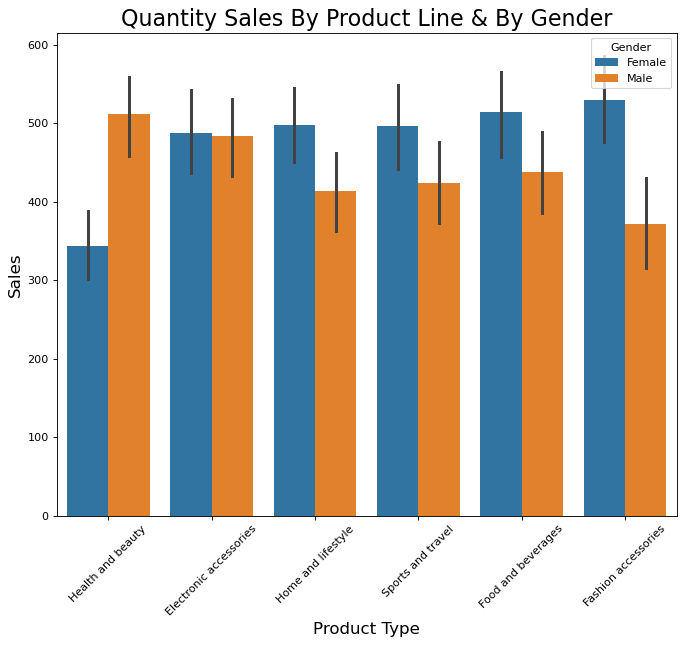

In [71]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'Product line' , y = 'Quantity', data = df, estimator=sum, hue='Gender')
plt.title('Quantity Sales By Product Line & By Gender', size =20)
plt.xlabel("Product Type",size = 15)
plt.ylabel("Sales", size = 15)
plt.xticks(rotation=45)
plt.show()
## Show grapic quantity sales by product line by gender

- Most favorite product for Male Customers is Health & Beauty
- Least favorite product for Male Customers is Fashion Accessories
- Most favorite product for Female Customers is Fashion Accessories 
- Least favorite product for female Customers is Health & Beauty

In [72]:
df_analysis2 = df.pivot_table(index=['Product line', 'Customer type'], values='Quantity', aggfunc='sum')
df_analysis2.rename(columns = {'Total':'Sales'}, inplace=True)
df_analysis2

Quantity
Product line           Customer type          
Electronic accessories Member              429
                       Normal              542
Fashion accessories    Member              439
                       Normal              463
Food and beverages     Member              506
                       Normal              446
Health and beauty      Member              428
                       Normal              426
Home and lifestyle     Member              490
                       Normal              421
Sports and travel      Member              493
                       Normal              427

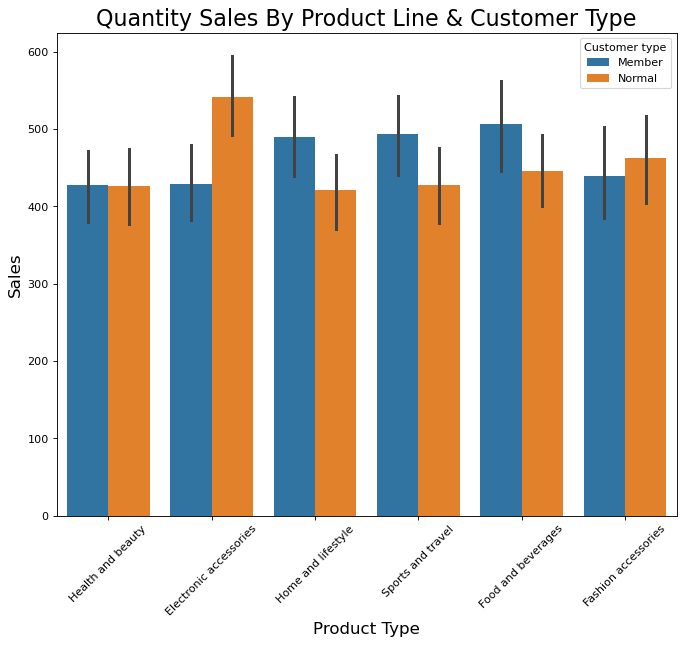

In [73]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'Product line' , y = 'Quantity', data = df, estimator=sum, hue='Customer type')
plt.title('Quantity Sales By Product Line & Customer Type', size =20)
plt.xlabel("Product Type",size = 15)
plt.ylabel("Sales", size = 15)
plt.xticks(rotation=45)
plt.show()

- Electronic accesories product (the top quantity sales) has more number of Non-Member Customer 
- Fashion accesories product (the top sales) has more number of Non-Member Customer

In [74]:
df_analysis3 = df.pivot_table(index=['Day Name', 'Product line'], values='Quantity', aggfunc='sum')
df_analysis3.rename(columns = {'Total':'Sales'}, inplace=True)
df_analysis3

Quantity
Day Name  Product line                    
Monday    Electronic accessories       124
          Fashion accessories           92
          Food and beverages            98
          Health and beauty            140
          Home and lifestyle           111
          Sports and travel             73
Tuesday   Electronic accessories       151
          Fashion accessories          119
          Food and beverages           168
          Health and beauty            155
          Home and lifestyle           136
          Sports and travel            133
Wednesday Electronic accessories        89
          Fashion accessories          134
          Food and beverages           185
          Health and beauty            131
          Home and lifestyle           102
          Sports and travel            159
Thursday  Electronic accessories       213
          Fashion accessories          119
          Food and beverages           116
          Health and beauty             96
          Home and lifestyle            95
          Sports and travel            116
Friday    Electronic accessories       101
          Fashion accessories          156
          Food and beverages            95
          Health and beauty            145
          Home and lifestyle           131
          Sports and travel            130
Saturday  Electronic accessories       159
          Fashion accessories          179
          Food and beverages           151
          Health and beauty            107
          Home and lifestyle           149
          Sports and travel            174
Sunday    Electronic accessories       134
          Fashion accessories          103
          Food and beverages           139
          Health and beauty             80
          Home and lifestyle           187
          Sports and travel            135

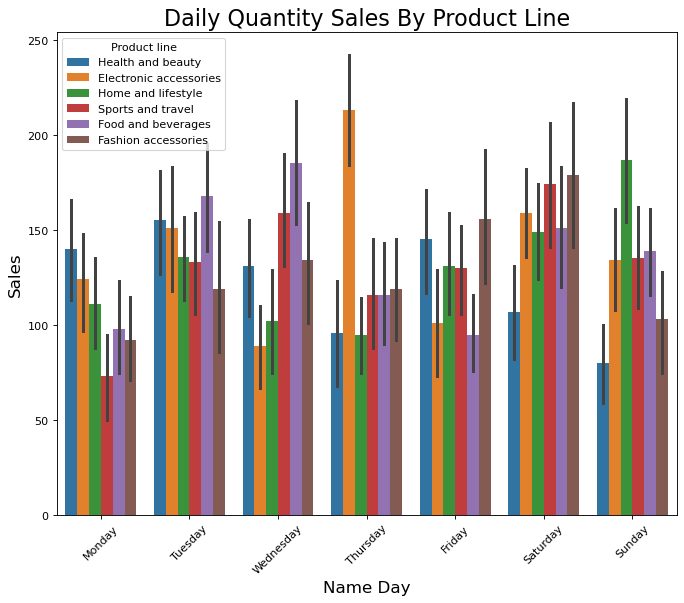

In [75]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'Day Name' , y = 'Quantity', data = df, estimator=sum, hue='Product line')
plt.title('Daily Quantity Sales By Product Line', size =20)
plt.xlabel("Name Day",size = 15)
plt.ylabel("Sales", size = 15)
plt.xticks(rotation=45)
plt.show()

- Monday is the most favorite day for customers to buy Health & Beauty Product
- Friday & Saturday is the most favorite day for customer to buy Fashion Accessories Product

In [76]:
df_analysis4 = df.pivot_table(index=['Day Name', 'Gender'], values='Quantity', aggfunc='sum')
df_analysis4.rename(columns = {'Total':'Sales'}, inplace=True)
df_analysis4

Quantity
Day Name  Gender          
Monday    Female       349
          Male         289
Tuesday   Female       499
          Male         363
Wednesday Female       362
          Male         438
Thursday  Female       349
          Male         406
Friday    Female       400
          Male         358
Saturday  Female       493
          Male         426
Sunday    Female       417
          Male         361

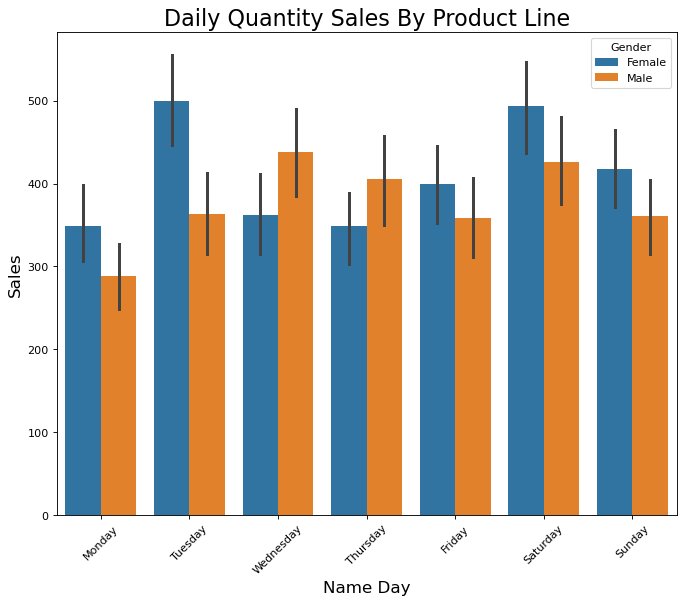

In [77]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'Day Name' , y = 'Quantity', data = df, estimator=sum, hue='Gender')
plt.title('Daily Quantity Sales By Product Line', size =20)
plt.xlabel("Name Day",size = 15)
plt.ylabel("Sales", size = 15)
plt.xticks(rotation=45)
plt.show()

- Wednesday & Thursday is the most favorite days for Male Customers to do shopping
- Apart from Wednesday & Thursday, supermarket is dominated by Female Customers

In [78]:
## Lebih Menonjolkan Product Health & Beayuty pada haru Rabu dan Kamis
## Lebih Menonjolkan Fashion Accesories pada hari Senin Selasa Jumat Sabtu Minggu

In [79]:
df_analysis5 = df.pivot_table(index=['Payment', 'Gender'], values='Total', aggfunc='count')
df_analysis5.rename(columns = {'Total':'Sales'}, inplace=True)
df_analysis5

Sales
Payment     Gender       
Cash        Female    178
            Male      166
Credit card Female    163
            Male      148
Ewallet     Female    160
            Male      185

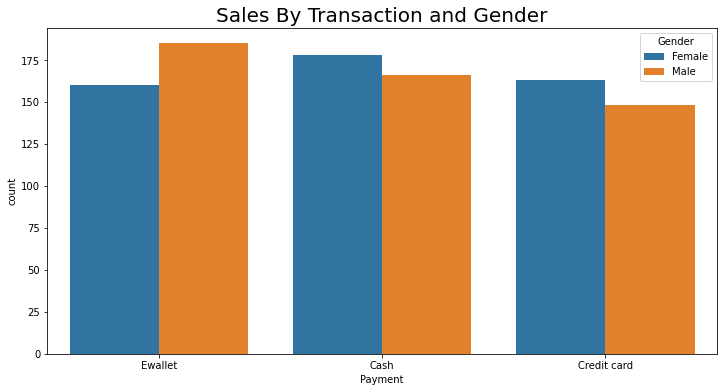

In [80]:
plt.figure(figsize=(12, 6))
plt.title('Sales By Transaction and Gender', size=20)
sns.countplot(df['Payment'], hue = df['Gender'])
plt.show()

- Male customers are more comfortable to use E-wallet as transaction method 
- Female customers are more comfortabe to use Cash as transaction method

In [81]:
df_analysis6 = df.pivot_table(index=['Customer type', 'Gender'], values='Total', aggfunc='count')
df_analysis6.rename(columns = {'Total':'Sales'}, inplace=True)
df_analysis6

Sales
Customer type Gender       
Member        Female    261
              Male      240
Normal        Female    240
              Male      259

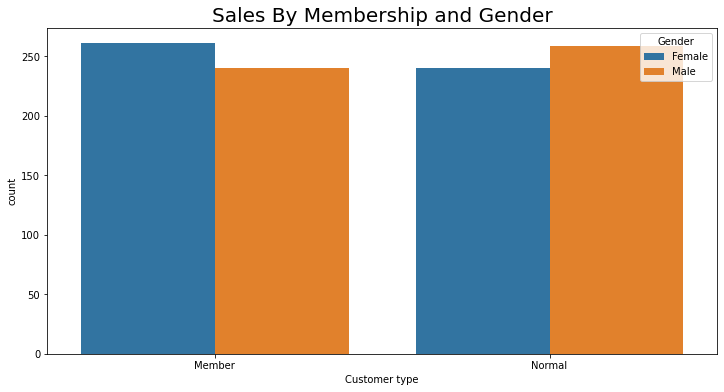

In [82]:
plt.figure(figsize=(12, 6))
plt.title('Sales By Membership and Gender', size=20)
sns.countplot(df['Customer type'], hue = df['Gender'])
plt.show()

- Female customers are tend to be a Supermarket Member than Male Customers

# DATA INSIGHT

- Quantity sales share in three branch are quite even 
- Fashion Accessories and Health & Beauty product are two worst sales by (sum of quantity).
- Fashion Accessories has the most transaction number (178) in supermarket, but customers tend to buy it in small quantity resulting only average 5 item/transaction
- Health & Beauty product averaging 5.6 item/transaction (quite good) but has the worst transaction number in supermarket --> Resulting bad quantity sales
- Member customers tend to buy more quantity of item than Non Member customers
- Female tend to buy more quantity of item than Male 
- Customers tend to use E-Wallet and Cash Rather than Credit Card
- Most transaction occured on Saturday & Tuesday while Least transaction occured on Monday 
- Rush Hour Transaction occured on 19:00 - 19:59 and Least Hour Transaction occured on 17:00 - 17:59
- Most favorite product for Male Customers is Health & Beauty
- Least favorite product for Male Customers is Fashion Accessories
- Most favorite product for Female Customers is Fashion Accessories 
- Least favorite product for female Customers is Health & Beauty
- Electronic accesories product (the top quantity sales) has more number of Non-Member Customer 
- Fashion accesories product (the top sales) has more number of Non-Member Customer
- Monday is the most favorite day for customers to buy Health & Beauty Product
- Friday & Saturday is the most favorite day for customer to buy Fashion Accessories Product
- Wednesday & Thursday is the most favorite days for Male Customers to do shopping
- Apart from Wednesday & Thursday, supermarket is dominated by Female Customers
- Male customers are more comfortable to use E-wallet as transaction method 
- Female customers are more comfortabe to use Cash as transaction method
- Female customers are tend to be a Supermarket Member than Male Customers

# SUMMARY & RECOMMENDATION

- Create package promotion on Health & Beauty with Fashion Accesories to boost both transaction number of Health & Beauty and Quantity sales of Fashion Accessories
- Package promotion should be held on Monday & Saturday (Most Favorite day of customer to buy Health & Beauty and Fashion Accesories Product)
- Create standard operation procedure for cashier to explain benefit of being member and offer customers to join Supermarket Membership (Focus on Big Transaction such as Electronic and Fashion Accessories) 
- Offer collaboration with Bank to give customers discount promotion to boost credit card usage 
- Offer collaboration with Fintech (Ewallet) to give customers discount on Health & Beauty products (Male)
- Open more cashier line on Rush Hour (19:00 - 19:59) and reduce cashier line on Least Transaction Hour (17:00 - 17:59)

# BUSINESS IMPACT SIMULATION

df.head()

#### Before

In [83]:
df_1 = df[(df['Product line']=='Fashion accessories') | (df['Product line'] == 'Health and beauty')].pivot_table(index='Product line', values='Quantity', aggfunc='count')
df_1.rename(columns = {'Quantity':'Transaction'}, inplace=True)

In [84]:
df_2 = df[(df['Product line']=='Fashion accessories') | (df['Product line'] == 'Health and beauty')].pivot_table(index='Product line', values='Quantity', aggfunc='mean')
df_2.rename(columns = {'Quantity':'Item/Transaction'}, inplace=True)

In [85]:
df_merge_1 = pd.merge(df_1, df_2, on = ['Product line'])

In [86]:
df_3 = df[(df['Product line']=='Fashion accessories') | (df['Product line'] == 'Health and beauty')].pivot_table(index='Product line', values='Quantity', aggfunc='sum')
df_3.rename(columns = {'Quantity':'Quantity Sales'}, inplace=True)

In [87]:
df_merge_2 = pd.merge(df_merge_1, df_3, on = ['Product line'])
df_merge_2

,Transaction,Item/Transaction,Quantity Sales
Product line,,,
Fashion accessories,178,5.067416,902
Health and beauty,152,5.618421,854


In [88]:
old_sales = sum(df_productlineqty['Sales'])
old_sales

5510

#### After

In [89]:
df_merge_2['Transaction'] = 178
df_merge_2['Item/Transaction'] = 5.618421
df_merge_2['Quantity Sales'] = df_merge_2['Transaction'] * df_merge_2['Item/Transaction']

In [90]:
df_merge_2

,Transaction,Item/Transaction,Quantity Sales
Product line,,,
Fashion accessories,178,5.618421,1000.078938
Health and beauty,178,5.618421,1000.078938


In [91]:
product = ['Electronic accessories', 'Home and lifestyle', 'Sports and travel', 'Food and beverages', 'Fashion accessories']

In [92]:
df_new = df[df['Product line'].isin(product)]

In [93]:
df_newproductlineqty = df_new.pivot_table(index='Product line', values='Quantity', aggfunc='sum').sort_values('Quantity', ascending=False).reset_index()
df_newproductlineqty.rename(columns = {'Quantity':'Sales'}, inplace=True)

In [94]:
a = sum(df_merge_2['Quantity Sales'])

In [95]:
b = sum(df_newproductlineqty['Sales'])

In [96]:
new_sales = a + b

In [97]:
new_sales

6656.157876

In [98]:
(new_sales/old_sales) * 100

120.80141335753176

# Impact : 20% Increament of Sales in Q2!!